In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from fractions import Fraction

In [2]:
#import csv (includes MovieData.csv and API data)
combined_df = pd.read_csv("Resources/api_merge_df.csv")
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
combined_df.dtypes

movie_name                   object
Country                      object
Release Date                 object
IMDB Rating                 float64
Metascore                   float64
TomatoMeter                  object
production_budget             int64
domestic_box_office           int64
international_box_office      int64
rating                       object
genre                        object
Total Box Office              int64
ROI                          object
dtype: object

In [4]:
combined_df.count()

movie_name                  1800
Country                     1800
Release Date                1800
IMDB Rating                 1800
Metascore                   1729
TomatoMeter                 1800
production_budget           1800
domestic_box_office         1800
international_box_office    1800
rating                      1800
genre                       1800
Total Box Office            1800
ROI                         1800
dtype: int64

In [5]:
#metascore showing N/A values, evening row count
cleaned_df = combined_df.dropna()

In [6]:
#converting metascore to 0.0/10 
#cleaned_df["Metascore"] = (cleaned_df["Metascore"]*.1).round(1)
#cleaned_df

In [7]:
#imdb ratings to list 
imdb_rating = cleaned_df["IMDB Rating"].to_list()
imdb_rating

[5.2,
 6.4,
 6.8,
 6.7,
 6.2,
 5.5,
 6.2,
 7.3,
 5.4,
 6.8,
 6.3,
 6.9,
 6.9,
 6.5,
 7.0,
 7.0,
 7.9,
 7.5,
 6.7,
 7.0,
 5.1,
 7.3,
 6.3,
 4.7,
 7.3,
 6.1,
 5.5,
 5.1,
 6.5,
 8.2,
 5.8,
 7.6,
 7.6,
 5.0,
 5.0,
 6.4,
 5.4,
 3.3,
 6.1,
 7.4,
 6.3,
 7.5,
 6.7,
 7.0,
 7.5,
 2.8,
 7.3,
 5.1,
 6.1,
 5.9,
 2.8,
 5.3,
 6.4,
 6.2,
 7.1,
 7.4,
 5.1,
 4.8,
 7.1,
 5.3,
 2.9,
 7.5,
 6.3,
 6.5,
 5.8,
 7.7,
 7.4,
 5.4,
 6.9,
 6.9,
 7.5,
 4.4,
 5.1,
 6.0,
 6.0,
 7.1,
 7.1,
 6.6,
 7.2,
 5.8,
 6.0,
 5.4,
 6.7,
 7.2,
 6.8,
 5.5,
 6.9,
 4.4,
 7.0,
 6.4,
 4.7,
 5.1,
 7.3,
 6.8,
 5.1,
 7.8,
 7.1,
 8.5,
 6.5,
 6.7,
 5.8,
 7.0,
 6.5,
 6.6,
 4.5,
 5.6,
 6.5,
 8.2,
 7.6,
 5.8,
 5.0,
 5.6,
 5.8,
 7.0,
 5.6,
 5.5,
 8.0,
 6.2,
 4.4,
 5.6,
 6.5,
 6.1,
 7.5,
 4.4,
 7.1,
 5.9,
 6.9,
 4.4,
 6.6,
 6.8,
 6.6,
 5.5,
 6.5,
 7.9,
 5.7,
 5.3,
 6.4,
 6.3,
 6.4,
 6.9,
 6.0,
 6.1,
 8.5,
 8.0,
 5.1,
 8.0,
 6.4,
 6.6,
 6.0,
 6.6,
 6.9,
 6.1,
 5.7,
 6.7,
 7.3,
 6.0,
 5.9,
 7.3,
 5.3,
 6.5,
 5.9,
 6.6,
 5.8,
 6.4,
 6.3,
 5.8,
 5.9

In [8]:
#metascore ratings to list
#metascore = combined_df["Metascore"].to_list()

In [9]:
#metascore to list
metascore = (cleaned_df["Metascore"]*.1).round(1).to_list()
metascore

[4.5,
 6.8,
 4.5,
 7.5,
 4.8,
 3.6,
 6.1,
 4.0,
 3.6,
 5.9,
 6.8,
 5.7,
 8.7,
 4.8,
 6.5,
 6.8,
 8.9,
 7.5,
 6.2,
 5.4,
 3.8,
 4.6,
 5.5,
 4.5,
 9.1,
 5.7,
 4.6,
 2.7,
 6.9,
 9.8,
 3.0,
 6.8,
 6.8,
 5.0,
 5.0,
 5.2,
 4.5,
 2.1,
 6.3,
 4.1,
 4.6,
 9.0,
 5.7,
 8.2,
 6.9,
 2.3,
 7.3,
 2.4,
 3.8,
 4.4,
 1.1,
 1.9,
 5.3,
 3.9,
 7.3,
 6.9,
 3.3,
 2.7,
 6.3,
 4.3,
 1.8,
 6.2,
 4.5,
 5.9,
 4.1,
 5.3,
 7.3,
 2.9,
 5.7,
 5.2,
 6.7,
 1.8,
 5.0,
 4.9,
 4.9,
 6.0,
 6.0,
 5.5,
 5.8,
 5.2,
 4.9,
 5.8,
 5.3,
 5.1,
 5.2,
 2.5,
 6.2,
 2.6,
 4.7,
 6.5,
 3.4,
 4.2,
 6.4,
 5.2,
 4.0,
 6.8,
 6.3,
 6.6,
 5.9,
 3.6,
 5.9,
 7.0,
 5.2,
 6.3,
 2.8,
 4.7,
 3.1,
 6.2,
 7.6,
 4.5,
 2.8,
 4.2,
 4.5,
 7.9,
 4.6,
 3.3,
 6.4,
 3.7,
 4.3,
 4.9,
 4.7,
 4.9,
 5.6,
 2.6,
 5.3,
 6.6,
 5.3,
 2.6,
 6.6,
 5.8,
 6.8,
 3.6,
 7.6,
 8.4,
 3.8,
 4.7,
 4.5,
 6.8,
 7.7,
 5.2,
 4.5,
 4.9,
 8.5,
 6.4,
 3.8,
 8.0,
 4.8,
 4.6,
 6.5,
 7.4,
 6.6,
 5.4,
 5.0,
 5.8,
 5.3,
 7.2,
 3.6,
 7.7,
 3.2,
 6.2,
 4.7,
 6.3,
 2.5,
 4.7,
 6.5,
 3.9,
 3.5

In [19]:
combined_df["TomatoMeter"] = combined_df["TomatoMeter"].replace('%','',regex=True)
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [22]:
combined_df["TomatoMeter"] = combined_df["TomatoMeter"].apply(pd.eval)
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26.0,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88.0,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41.0,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81.0,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28.0,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79.0,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65.0,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88.0,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97.0,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [31]:
t_list = (combined_df["TomatoMeter"]*.1).to_list()
t_list

[2.6,
 8.8,
 4.1000000000000005,
 8.1,
 2.8000000000000003,
 2.0,
 4.7,
 2.5,
 1.8,
 5.800000000000001,
 2.8000000000000003,
 5.2,
 6.1000000000000005,
 9.4,
 2.1,
 6.2,
 7.4,
 9.1,
 8.0,
 7.5,
 4.7,
 1.4000000000000001,
 5.0,
 4.7,
 2.0,
 9.600000000000001,
 5.300000000000001,
 2.6,
 0.9,
 8.6,
 9.5,
 1.3,
 7.4,
 7.4,
 7.1000000000000005,
 7.1000000000000005,
 5.2,
 3.8000000000000003,
 0.5,
 6.2,
 4.1000000000000005,
 4.0,
 9.0,
 4.9,
 8.3,
 7.4,
 0.8,
 8.5,
 1.0,
 1.9000000000000001,
 2.6,
 0.7000000000000001,
 0.4,
 3.1,
 2.1,
 6.800000000000001,
 6.9,
 1.1,
 1.1,
 7.7,
 2.9000000000000004,
 0.4,
 8.6,
 4.3,
 7.300000000000001,
 4.3,
 0.053000000000000005,
 8.700000000000001,
 1.4000000000000001,
 6.7,
 4.2,
 7.300000000000001,
 0.8,
 4.0,
 5.1000000000000005,
 5.1000000000000005,
 9.3,
 9.3,
 4.4,
 10.0,
 4.0,
 3.4000000000000004,
 6.9,
 4.2,
 5.2,
 5.300000000000001,
 3.7,
 1.3,
 7.5,
 0.4,
 2.5,
 5.7,
 0.5,
 3.5,
 7.2,
 3.5,
 3.5,
 6.6000000000000005,
 7.2,
 7.6000000000000005,


In [ ]:
#combined_df["TomatoMeter"] = combined_df["TomatoMeter"].replace('%','',regex=True).astype('float')/100
#combined_df

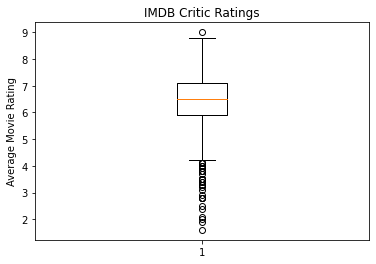

In [25]:
#creating boxplot for critic ratings
fig1, ax1 = plt.subplots()
ax1.set_title('IMDB Critic Ratings')
ax1.set_ylabel('Average Movie Rating')
ax1.boxplot(imdb_rating)
plt.show()

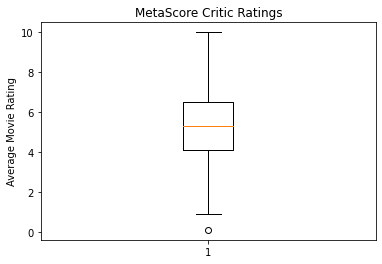

In [26]:
#creating boxplot for critic ratings
fig2, ax2 = plt.subplots()
ax2.set_title('MetaScore Critic Ratings')
ax2.set_ylabel('Average Movie Rating')
ax2.boxplot(metascore)
plt.show()

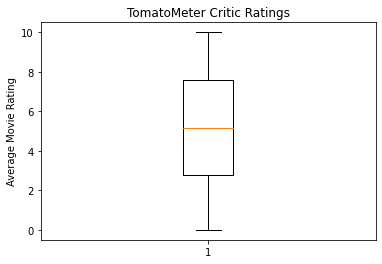

In [32]:
#creating boxplot for tomatoMeter ratings
fig3, ax3 = plt.subplots()
ax3.set_title('TomatoMeter Critic Ratings')
ax3.set_ylabel('Average Movie Rating')
ax3.boxplot(t_list)
plt.show()

In [ ]:
#combine boxplots to compare critic ratings 
